# [Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Import Fashion MNIST

classification dataset, similar to the handwritten digits dataset but more challenging. 

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


This returned 4 numpy arrays. The train images are 28x28 numpy arrays in grayscale. labels are arrays of integers from 0-9 corresponding to the class of clothing. 

In [4]:
# generate a list of class names since they don't come with the dataset
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [8]:
import pandas as pd
pd.Series(train_labels).value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [9]:
test_images.shape

(10000, 28, 28)

## Data preprocessing

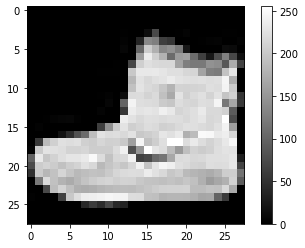

In [10]:
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

Normalize values to be between 0 and 1

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first 25 images from the training set

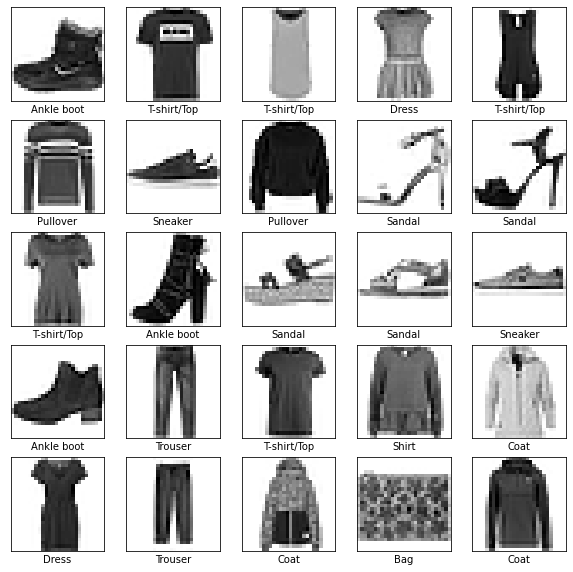

In [12]:
plt.figure(figsize=(10,10))
for i in range(25): 
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Configure the layers of the model, the compile the model

### Set up layers

Most of deep learning is chaining simple layers. Most layers, like `tf.keras.layers.Dense` have parameters that are learned / tweaked during training. 

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10)
])

`tf.keras.layers.Flatten` - flatten image from 28x28 array to a 1d array of 784 pixels. This only reformats the data. 

There are two layers of `tf.keras.layers.Dense`. These are fully connected layers (i.e. each neuron in one layer has a connection to every neuron in the previous layer). The first layer has 128 neurons. The last returns logits (unormalized probabilities) in an array. Each neuron returns the probability that the input data belongs to the respective class. 

### Compile the model 

- **Loss function** - A function that measures how accurate the model is. Smaller loss function = better accuracy
- **Optimizer** - How the model is updated based on the data it sees. 
- **Metrics** - What measure to use to monitor training and testing. 

In [14]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

## Train the model

- Feed data into the model
- Model learns how to associate images and labels
- Have the model make predictions on the test set
- Verify predictions match the labels

### Feed the model

Call `model.fit`

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.4960 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.3775 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.3385 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.3133 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.2979 - accuracy: 0.8889
Epoch 6/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.2805 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.2671 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.2575 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.2487 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 2s 917u

### Evaluate accuracy

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 0s - loss: 0.3208 - accuracy: 0.8887

Test accuracy: 0.888700008392334


Small gap between test accuracy and training accuracy due to overfitting. 

### Make predictions

Attach softmax layer to transform logits to probabilities

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Look at first prediction

In [19]:
predictions[0]

array([1.2327610e-05, 8.4733323e-09, 2.2404355e-07, 2.2684084e-11,
       2.8321867e-07, 5.9740880e-04, 6.7800336e-08, 2.5044247e-03,
       9.6869041e-07, 9.9688429e-01], dtype=float32)

Each entry in the array is the probability the model assigned to the given class. Find which label has the highest confidence value

In [20]:
np.argmax(predictions[0])

9

In [21]:
print("Model thinks that this image is a(n): ", class_names[9])

Model thinks that this image is a:  Ankle boot


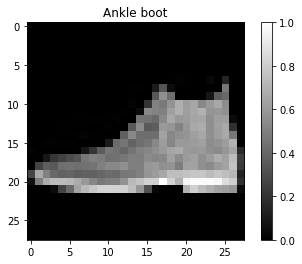

In [24]:
plt.figure()
plt.imshow(test_images[0], cmap="gray")
plt.title(class_names[test_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

And indeed this was an ankle boot. 

Make some graphs to look at the predictions

In [31]:
def plot_image(i, predictions_array, true_label, img): 
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label: 
        color = 'blue'
    else: 
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array), 
                                        class_names[true_label], 
                                        color=color))
def plot_value_array(i, predictions_array, true_label): 
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Verify some random predictions

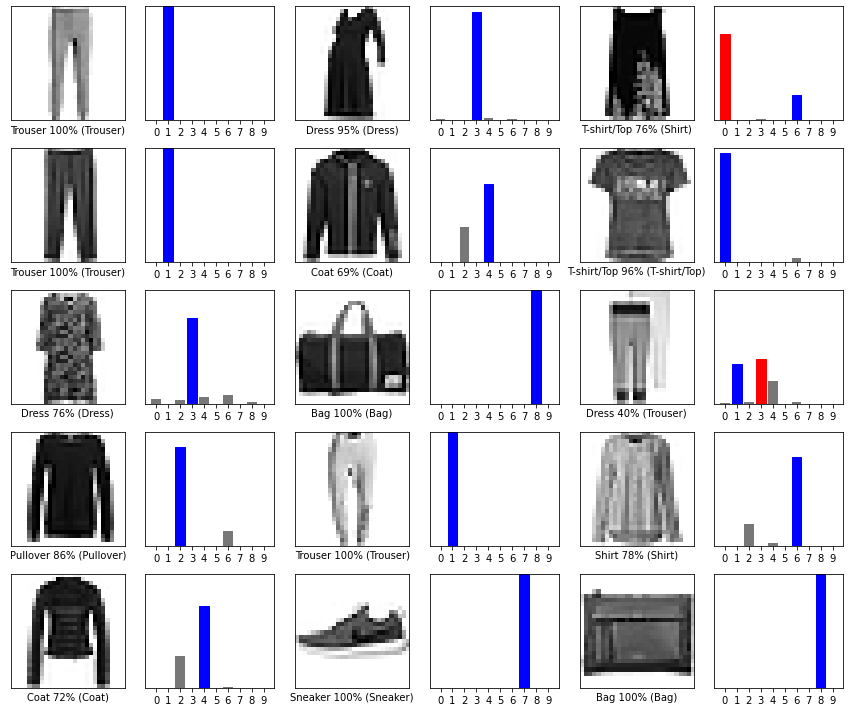

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols 

indices = np.random.choice(a=len(test_images), size=num_images, replace=False)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i, index in enumerate(indices): 
    
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[index], test_labels[indices], test_images[indices])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[index], test_labels[indices])
plt.tight_layout()
plt.show()